# 0.0 Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import inflection
import datetime
from IPython.display import Image
from IPython.core.display import HTML

## Helper functions

## Load Data

In [3]:
df_sales_raw = pd.read_csv("../dataset/train.csv", low_memory=False)
df_store_raw = pd.read_csv("../dataset/store.csv", low_memory=False)
df_raw = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')


In [4]:
df_raw.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

# 1.0 Data Description

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [8]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of columns:{}'.format(df1.shape[1]))

Number of rows:1017209
Number of columns:18


## 1.3 Data types

In [9]:
df1['date'] = pd.to_datetime(df1['date'])

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()


store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
#competition_distance
df1['competition_distance'] = [200000 if math.isnan(i) else i for i in df1['competition_distance']]

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else 
                                                x['competition_open_since_month'], axis = 1)
#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else 
                                                x['competition_open_since_year'], axis = 1)            
#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else 
                                               x['promo2_since_week'], axis = 1) 
#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else 
                                               x['promo2_since_year'], axis = 1)     
#promo_interval  
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'] = df1['promo_interval'].fillna(0)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval']==0 else
                                                             1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [13]:
df1.sample(10)

store  day_of_week       date  sales  customers  open  promo  \
981534      5            5 2013-02-01   4241        576     1      0   
694454    595            4 2013-10-17  10861       1453     1      0   
738881    422            6 2013-09-07   3915        423     1      0   
518533    844            1 2014-03-24   3316        421     1      0   
20194     125            1 2015-07-13  16585       1928     1      1   
511123    124            7 2014-03-30      0          0     0      0   
512579    465            6 2014-03-29   6651        578     1      0   
893117    788            1 2013-04-22  23523       2227     1      1   
2584      355            3 2015-07-29   9290       1029     1      1   
839587    778            7 2013-06-09      0          0     0      0   

       state_holiday  school_holiday store_type assortment  \
981534             0               0          a          a   
694454             0               0          c          c   
738881             0               0          a          c   
518533             0               0          a          a   
20194              0               0          a          a   
511123             0               0          a          a   
512579             0               0          d          c   
893117             0               0          a          c   
2584               0               1          a          c   
839587             0               0          a          a   

        competition_distance  competition_open_since_month  \
981534               29910.0                           4.0   
694454                1130.0                           6.0   
738881                2880.0                           9.0   
518533                2030.0                           9.0   
20194                  760.0                          12.0   
511123                1410.0                           4.0   
512579               10890.0                           4.0   
893117                1530.0                           3.0   
2584                  9720.0                           8.0   
839587                 340.0                           6.0   

        competition_open_since_year  promo2  promo2_since_week  \
981534                       2015.0       0                5.0   
694454                       2015.0       0               42.0   
738881                       2013.0       0               36.0   
518533                       2012.0       1               18.0   
20194                        2005.0       0               29.0   
511123                       2003.0       0               13.0   
512579                       2005.0       0               13.0   
893117                       2013.0       0               17.0   
2584                         2013.0       0               31.0   
839587                       2003.0       1               40.0   

        promo2_since_year   promo_interval month_map  is_promo  
981534             2013.0                0       Feb         0  
694454             2013.0                0       Oct         0  
738881             2013.0                0      Sept         0  
518533             2011.0  Feb,May,Aug,Nov       Mar         0  
20194              2015.0                0       Jul         0  
511123             2014.0                0       Mar         0  
512579             2014.0                0       Mar         0  
893117             2013.0                0       Apr         0  
2584               2015.0                0       Jul         0  
839587             2014.0  Jan,Apr,Jul,Oct       Jun         0

## 1.6 Change types

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int) 
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

In [16]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [17]:
# Tendencia Central (Central Tendency) - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão (Dispersion) - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = (['attributes','min','max','range','mean','median','std','skew','kurtosis'])
m

attributes     min       max     range         mean  \
0                          store     1.0    1115.0    1114.0   558.429727   
1                    day_of_week     1.0       7.0       6.0     3.998341   
2                          sales     0.0   41551.0   41551.0  5773.818972   
3                      customers     0.0    7388.0    7388.0   633.145946   
4                           open     0.0       1.0       1.0     0.830107   
5                          promo     0.0       1.0       1.0     0.381515   
6                 school_holiday     0.0       1.0       1.0     0.178647   
7           competition_distance    20.0  200000.0  199980.0  5935.442677   
8   competition_open_since_month     1.0      12.0      11.0     6.786849   
9    competition_open_since_year  1900.0    2015.0     115.0  2010.324840   
10                        promo2     0.0       1.0       1.0     0.500564   
11             promo2_since_week     1.0      52.0      51.0    23.619033   
12             promo2_since_year  2009.0    2015.0       6.0  2012.793297   
13                      is_promo     0.0       1.0       1.0     0.171835   

    median           std       skew    kurtosis  
0    558.0    321.908493  -0.000955   -1.200524  
1      4.0      1.997390   0.001593   -1.246873  
2   5744.0   3849.924283   0.641460    1.778375  
3    609.0    464.411506   1.598650    7.091773  
4      1.0      0.375539  -1.758045    1.090723  
5      0.0      0.485758   0.487838   -1.762018  
6      0.0      0.383056   1.677842    0.815154  
7   2330.0  12547.646829  10.242344  147.789712  
8      7.0      3.311085  -0.042076   -1.232607  
9   2012.0      5.515591  -7.235657  124.071304  
10     1.0      0.500000  -0.002255   -1.999999  
11    22.0     14.310057   0.178723   -1.184046  
12  2013.0      1.662657  -0.784436   -0.210075  
13     0.0      0.377237   1.739838    1.027039

/tmp/ipykernel_1417/4262099893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sales'])


<Axes: xlabel='sales', ylabel='Density'>

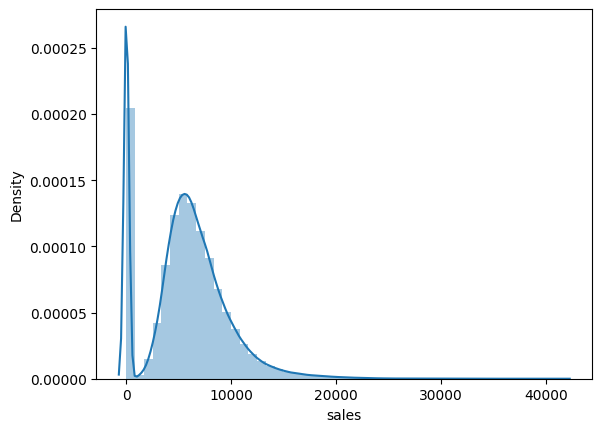

In [18]:
sns.distplot(df1['sales'])


### 1.7.2 Categorical Attributes

In [19]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

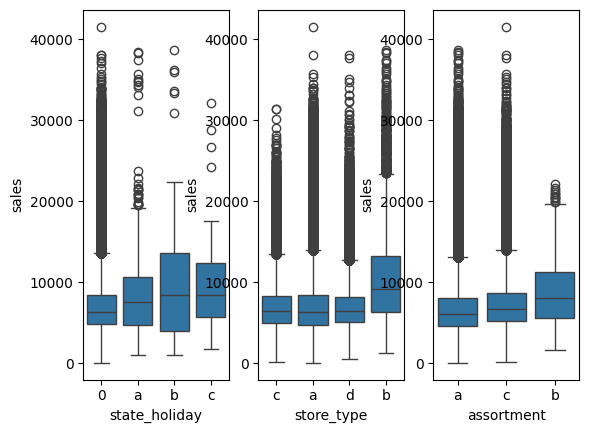

In [20]:
aux1 = df1[(df1['state_holiday'] !=0) & (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 Feature Engineering

In [22]:
df2 = df1.copy()

## Mind Map Hypothesis

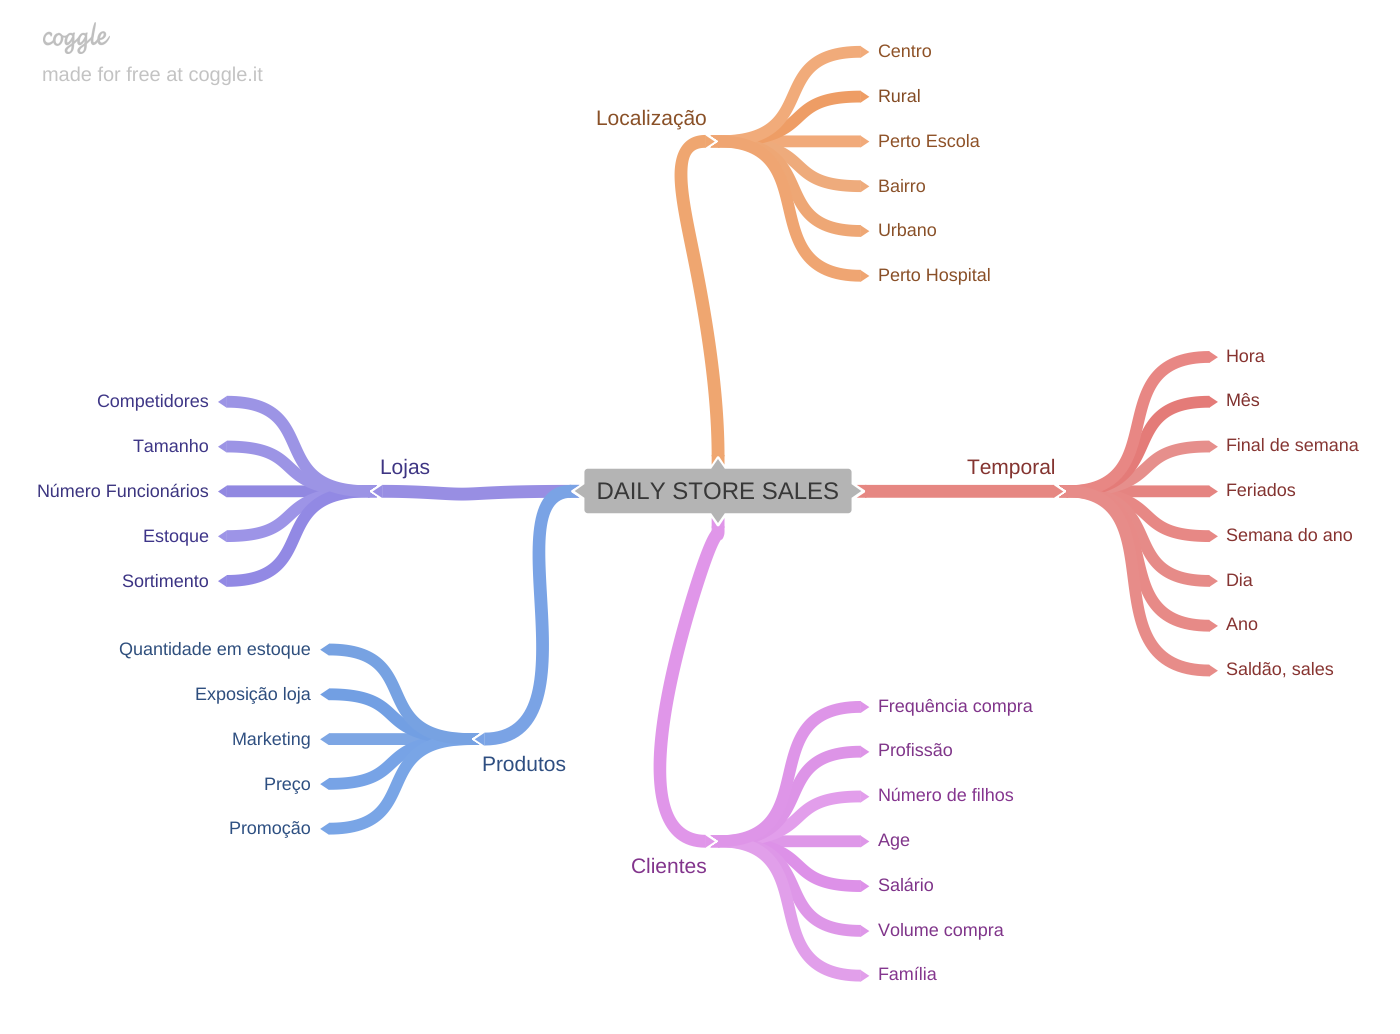

In [21]:
Image('../img/mindmaphypothesis.png')

## 2.2 Criação das Hipoteses

### 2.2.1 Lojas

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com competidores mais próximos deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores a mais tempo deveriam vender mais.

### 2.2.2 Produto

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas que expõe mais os produtos nas vitrines deveriam vender mais.

**3.** Lojas que têm preços menores nos produtos deveriam deveriam vender mais.

**4.** Lojas que têm preços menores nos produtos por mais tempo deveriam vender mais.

**5.** Lojas que têm promoções mais agressivas (descontos maiores) deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas com mais dias de promoçãos deveriam vender mais.

### 2.2.3 Tempo (Sazonalidade)

**1.** Lojas deveriam vender menos durante os feriados escolares.

**2.** Lojas deveriam vender menos aos finais de semana.

**3.** Lojas abertas durante o feriado de Natal deveriam deveriam vender mais.

**4.** Lojas deveriam vender mais ao longo dos anos.

**5.** Lojas deveriam vender mais no segundo semestre do ano.

**6.** Lojas deveriam vender mais depois do dia 10 de cada mês.

## 2.3 Lista final de hipóteses (Priorizar)

**1.** Lojas com competidores mais próximos deveriam vender menos.

**2.** Lojas com maior sortimento deveriam vender mais.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas que têm preços menores nos produtos por mais tempo deveriam vender mais.

**5.** Lojas com mais promoções consecutivas deveriam vender mais.

**6.** Lojas com mais dias de promoçãos deveriam vender mais.

**7.** Lojas deveriam vender menos durante os feriados escolares.

**8.** Lojas deveriam vender menos aos finais de semana.

**9.** Lojas abertas durante o feriado de Natal deveriam deveriam vender mais.

**10.** Lojas deveriam vender mais ao longo dos anos.

**11.** Lojas deveriam vender mais no segundo semestre do ano.

**12.** Lojas deveriam vender mais depois do dia 10 de cada mês.

## 2.4 Feature Engineering

In [35]:
# year
df2['year'] = df2['date'].dt.year
#month
df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day
#week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
df2['week_of_year'] = df2['week_of_year'].astype(int)
#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

In [40]:
# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],
                                                                month=x['competition_open_since_month'],
                                                                day=1), axis=1)

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)


In [51]:
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x +'-1',
                                                                                   '%Y-%W-%w') - 
                                              datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

In [67]:
#assortment
df2['assortment'] = ['basic' if i == 'a' else 'extra' if i == 'b' else 'extended' for i in df2['assortment']]

#state_holiday
df2['state_holiday'] = ['public_holiday' if i == 'a' else 'easter_holiday' if i == 'b' else 'christmas' if i == 'c' else 'regular_day' for i in df2['state_holiday']]

In [73]:
df2.sample(4).T

111282               336948  \
store                                         898                  625   
day_of_week                                     4                    1   
date                          2015-04-23 00:00:00  2014-09-15 00:00:00   
sales                                        5134                 9201   
customers                                     638                  769   
open                                            1                    1   
promo                                           0                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  0                    0   
store_type                                      a                    a   
assortment                               extended             extended   
competition_distance                      18540.0               1170.0   
competition_open_since_month                    4                    4   
competition_open_since_year                  2015                 2011   
promo2                                          0                    1   
promo2_since_week                              17                   22   
promo2_since_year                            2015                 2012   
promo_interval                                  0      Feb,May,Aug,Nov   
month_map                                     Apr                 Sept   
is_promo                                        0                    0   
year                                         2015                 2014   
month                                           4                    9   
day                                            23                   15   
year_week                                 2015-16              2014-37   
week_of_year                                   17                   38   
competition_since             2015-04-01 00:00:00  2011-04-01 00:00:00   
competition_time_month                          0                   42   
promo_since                   2015-04-20 00:00:00  2012-05-21 00:00:00   
promo_time_week                                 0                  121   

                                           539714               663453  
store                                         840                  814  
day_of_week                                     3                    4  
date                          2014-03-05 00:00:00  2013-11-14 00:00:00  
sales                                        9492                 7563  
customers                                    1253                  625  
open                                            1                    1  
promo                                           1                    0  
state_holiday                         regular_day          regular_day  
school_holiday                                  0                    0  
store_type                                      a                    d  
assortment                               extended             extended  
competition_distance                       1070.0              24530.0  
competition_open_since_month                    9                    7  
competition_open_since_year                  2009                 2013  
promo2                                          0                    0  
promo2_since_week                              10                   46  
promo2_since_year                            2014                 2013  
promo_interval                                  0                    0  
month_map                                     Mar                  Nov  
is_promo                                        0                    0  
year                                         2014                 2013  
month                                           3                   11  
day                                             5                   14  
year_week                                 2014-09              2013-45

In [74]:
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
year                                     int32
month        

# 3.0 Filtragem de Variáveis

In [75]:
df3 = df2.copy()

In [88]:
df3.head().T

0                    1  \
store                                           1                    2   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        5263                 6064   
customers                                     555                  625   
open                                            1                    1   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      c                    a   
assortment                               extended             extended   
competition_distance                       1270.0                570.0   
competition_open_since_month                    9                   11   
competition_open_since_year                  2008                 2007   
promo2                                          0                    1   
promo2_since_week                              31                   13   
promo2_since_year                            2015                 2010   
promo_interval                                  0      Jan,Apr,Jul,Oct   
month_map                                     Jul                  Jul   
is_promo                                        0                    1   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
year_week                                 2015-30              2015-30   
week_of_year                                   31                   31   
competition_since             2008-09-01 00:00:00  2007-11-01 00:00:00   
competition_time_month                         84                   94   
promo_since                   2015-07-27 00:00:00  2010-03-22 00:00:00   
promo_time_week                                 0                  279   

                                                2                    3  \
store                                           3                    4   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        8314                13995   
customers                                     821                 1498   
open                                            1                    1   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      a                    c   
assortment                               extended             extended   
competition_distance                      14130.0                620.0   
competition_open_since_month                   12                    9   
competition_open_since_year                  2006                 2009   
promo2                                          1                    0   
promo2_since_week                              14                   31   
promo2_since_year                            2011                 2015   
promo_interval                    Jan,Apr,Jul,Oct                    0   
month_map                                     Jul                  Jul   
is_promo                                        1                    0   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
year_week                                 2015-30  

## 3.1 Filtragem das linhas

In [87]:
df3 = df3.loc[(df3['open'] != 0) & (df3['sales'] > 0 )]

## 3.2 Seleção das colunas

In [90]:
cols_drop = ['customers', 'open', 'month_map', 'promo_interval']
df3 = df3.drop(cols_drop, axis=1)

In [91]:
df3.head().T

0                    1  \
store                                           1                    2   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        5263                 6064   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      c                    a   
assortment                               extended             extended   
competition_distance                       1270.0                570.0   
competition_open_since_month                    9                   11   
competition_open_since_year                  2008                 2007   
promo2                                          0                    1   
promo2_since_week                              31                   13   
promo2_since_year                            2015                 2010   
is_promo                                        0                    1   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
year_week                                 2015-30              2015-30   
week_of_year                                   31                   31   
competition_since             2008-09-01 00:00:00  2007-11-01 00:00:00   
competition_time_month                         84                   94   
promo_since                   2015-07-27 00:00:00  2010-03-22 00:00:00   
promo_time_week                                 0                  279   

                                                2                    3  \
store                                           3                    4   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        8314                13995   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      a                    c   
assortment                               extended             extended   
competition_distance                      14130.0                620.0   
competition_open_since_month                   12                    9   
competition_open_since_year                  2006                 2009   
promo2                                          1                    0   
promo2_since_week                              14                   31   
promo2_since_year                            2011                 2015   
is_promo                                        1                    0   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
year_week                                 2015-30              2015-30   
week_of_year                                   31                   31   
competition_since             2006-12-01 00:00:00  2009-09-01 00:00:00   
competition_time_month                        105                   71   
promo_since                   2011-03-28 00:00:00  2015-07-27 00:00:00   
promo_time_week                               226                    0   

                                                4  
store                                           5  
day_of_week                                     5  
date                          2015-07-31 0